In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


# 로딩한 데이터에서 증강

In [3]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255
test_x = raw_test_x/255

# train_x = train_x.reshape((60000, 28, 28, 1)) # COMMENT OUT
# test_x = test_x.reshape((10000, 28, 28, 1)) # COMMENT OUT

train_y = raw_train_y
test_y = raw_test_y

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


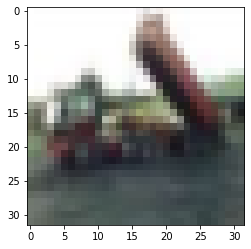

4 deer


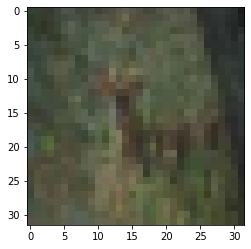

7 horse


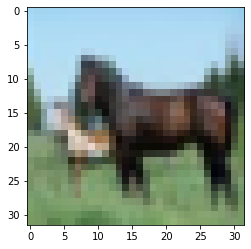

9 truck


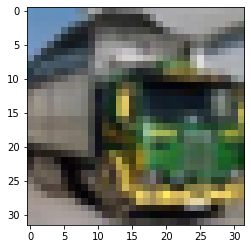

In [4]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False 
)

실습 시간 관계로 1000개만

In [22]:
train_x = train_x[:1000]
train_y = train_y[:1000]

In [23]:
BATCH_SIZE = 128
iterator = datagen.flow(train_x, train_y, batch_size=BATCH_SIZE)

datage.flow()의 봔환값은 python의 iterator이다.

next(iterator)를 호출하여 다음 아이템을 받을 수 있다.

```
item = next(iterator)
augmented_x, augmented_y = item
print(augmented_x.shape)
print(augmented_y.shape)

(128, 32, 32, 3)
(128, 1)
```

In [25]:
data_count = len(train_x)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)


augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)
  # print(len(augmented_x_list))
# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 1000
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 8
FETCH_COUNT : 16
(2000, 32, 32, 3)
(2000, 1)


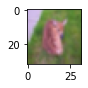

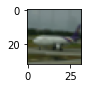

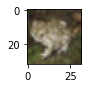

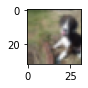

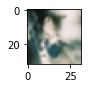

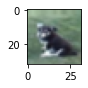

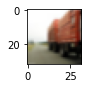

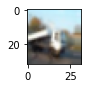

In [26]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

# 파일 시스템에서 증강

In [13]:
%%shell
rm -rf dogs_prepared.tar.gz
wget https://github.com/dhrim/opensw_camp_2020/raw/master/material/deep_learning/dogs_prepared.tar.gz
ls -al 

--2020-08-05 14:48:55--  https://github.com/dhrim/opensw_camp_2020/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/opensw_camp_2020/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2020-08-05 14:48:55--  https://raw.githubusercontent.com/dhrim/opensw_camp_2020/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M  61.4MB/s    in 1.0s    

2020-08-05 1

In [14]:
%%shell
rm -rf dogs_prepared
tar xvfz dogs_prepared.tar.gz
ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

In [32]:

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def my_preprocess_input(image):
  return image/255

BATCH_SIZE = 128

data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=my_preprocess_input
)

iterator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 1531 images belonging to 10 classes.


In [33]:
data_count = len(iterator.labels)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)

# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 1531
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 12
FETCH_COUNT : 24
(3062, 224, 224, 3)
(3062,)


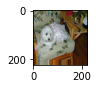

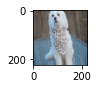

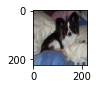

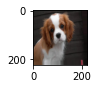

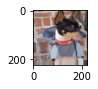

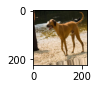

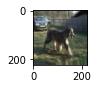

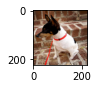

In [34]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()